<a href="https://colab.research.google.com/github/tanuja1207/python/blob/main/house_price_prediction_CapstoneProject17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house. 
 

---

---

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it. 

---

### Data Description

The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price). 

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


---

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv








In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


In [ ]:
# Check categorical attributes
categorical_df = df.select_dtypes(include = ['object'])
categorical_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


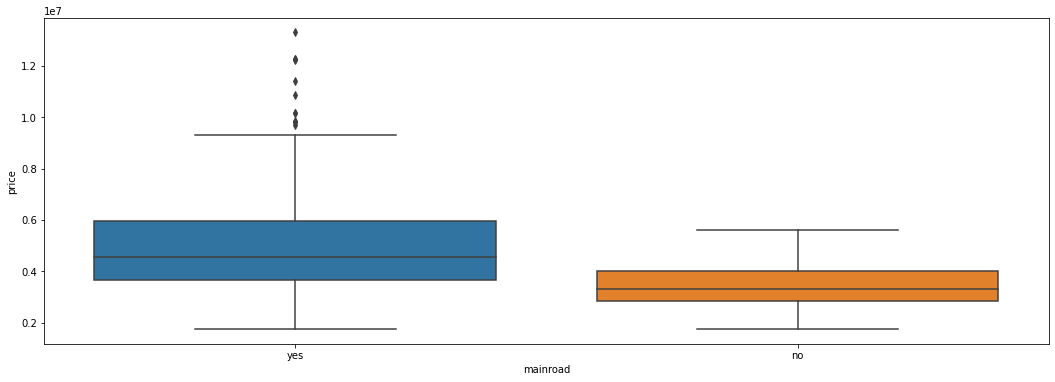

In [ ]:
# Boxplot for 'mainroad' vs 'price'
mainroad = df['mainroad'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='mainroad', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(mainroad))], labels=mainroad)
plt.show()

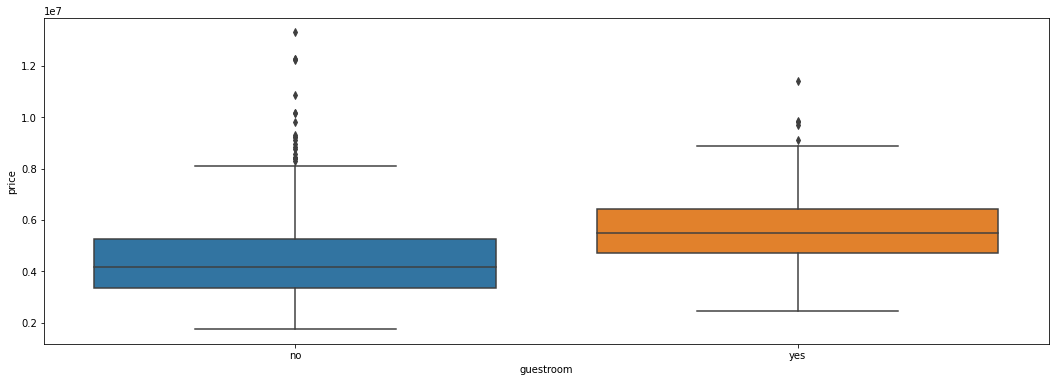

In [ ]:
# Boxplot for 'guestroom' vs 'price'

guestroom = df['guestroom'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='guestroom', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(guestroom))], labels=guestroom)
plt.show()

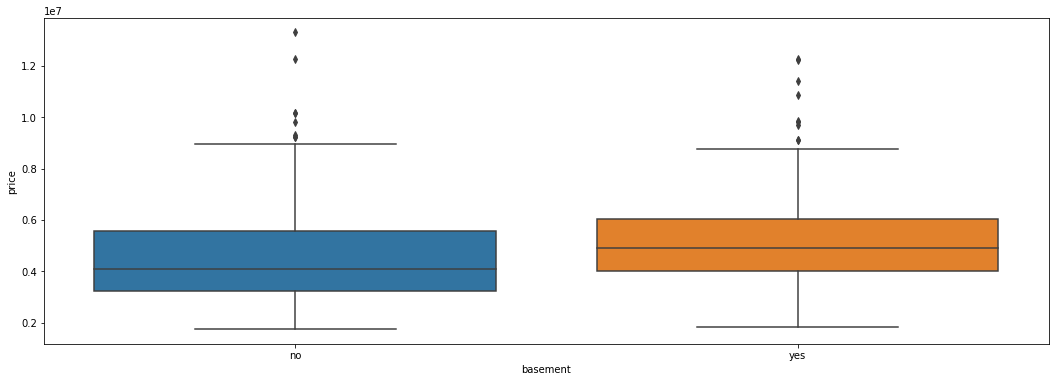

In [ ]:
# Boxplot for 'basement' vs 'price'
basement = df['basement'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='basement', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(basement))], labels=basement)
plt.show()

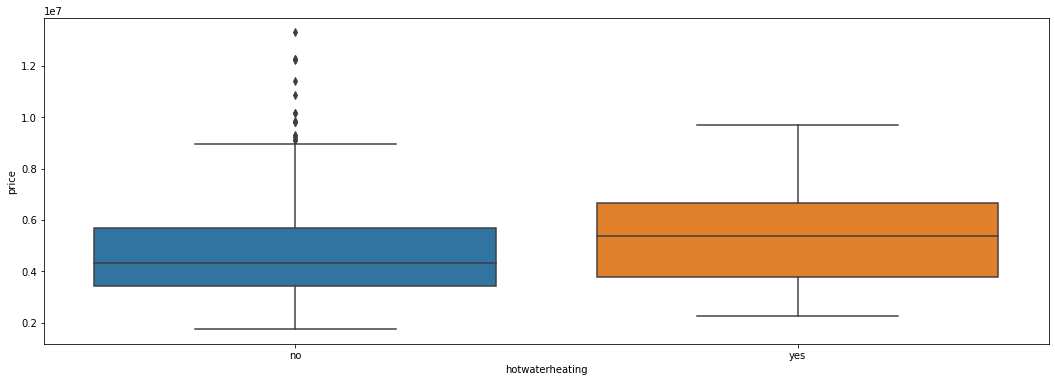

In [ ]:
# Boxplot for 'hotwaterheating' vs 'price'
hot = df['hotwaterheating'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(hot))], labels=hot)
plt.show()

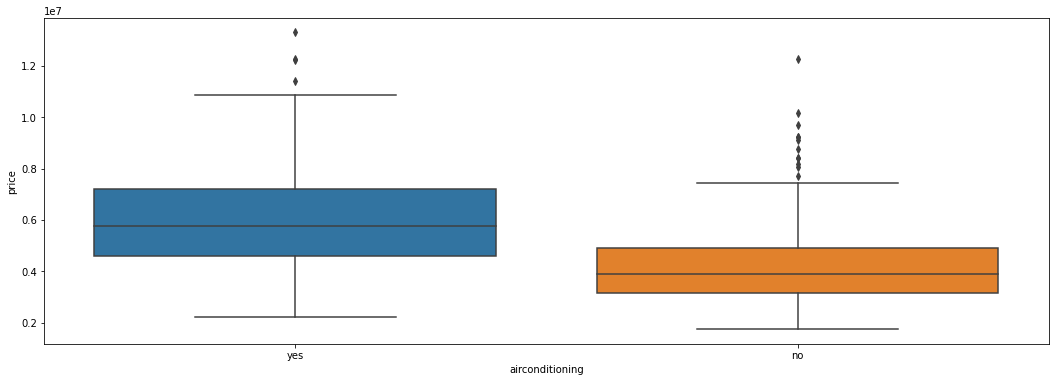

In [ ]:
# Boxplot for 'airconditioning' vs 'price'
air = df['airconditioning'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='airconditioning', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(air))], labels=air)
plt.show()


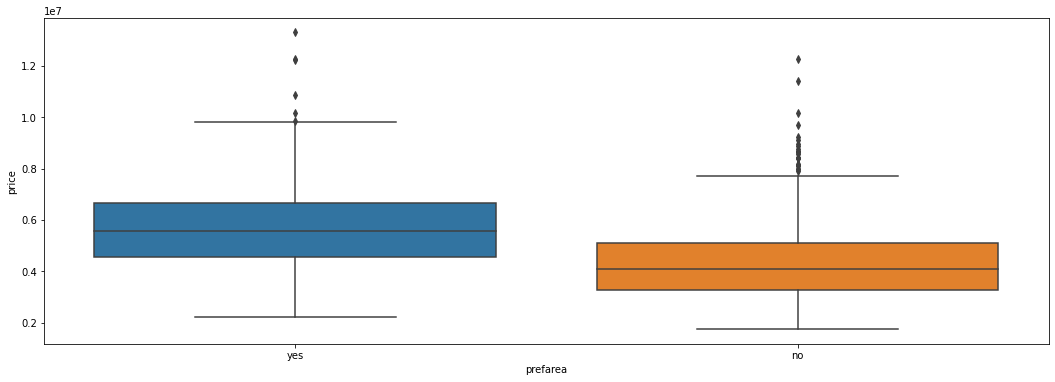

In [ ]:
# Boxplot for 'prefarea' vs 'price'
area = df['prefarea'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='prefarea', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(area))], labels=area)
plt.show()


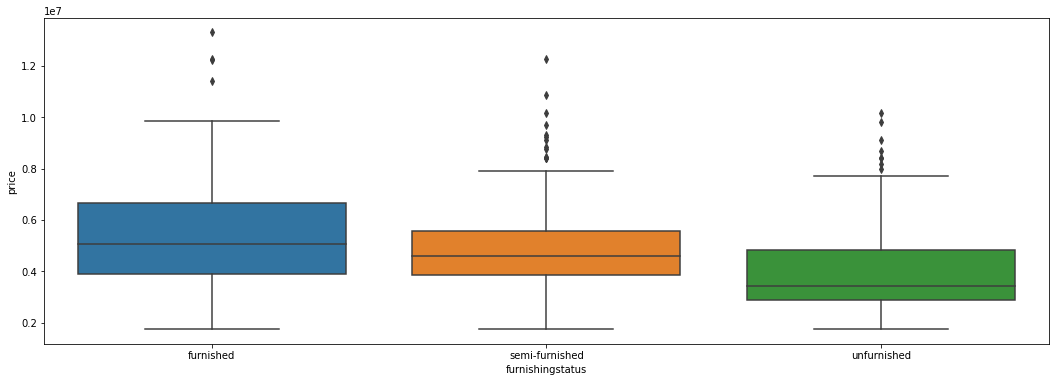

In [ ]:
# Boxplot for 'furnishingstatus' vs 'price'
furnish = df['furnishingstatus'].unique()

plt.figure(figsize=(18, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xticks(ticks=[i for i in range(len(furnish))], labels=furnish)
plt.show()

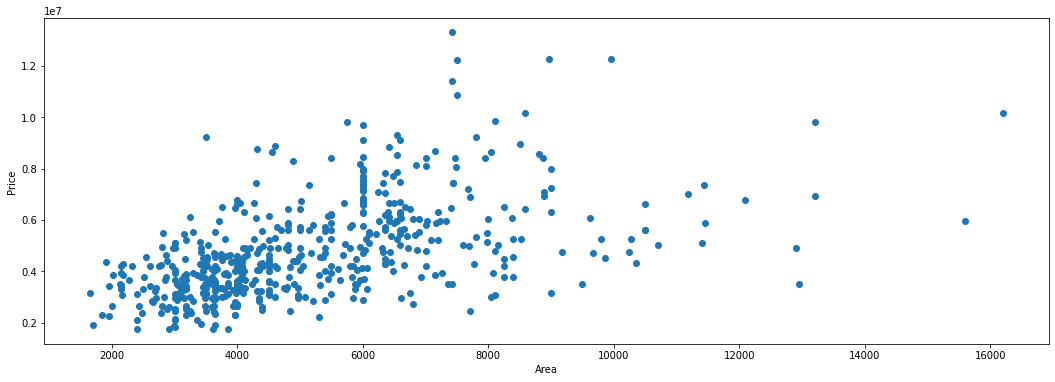

In [ ]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(df['area'],df['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


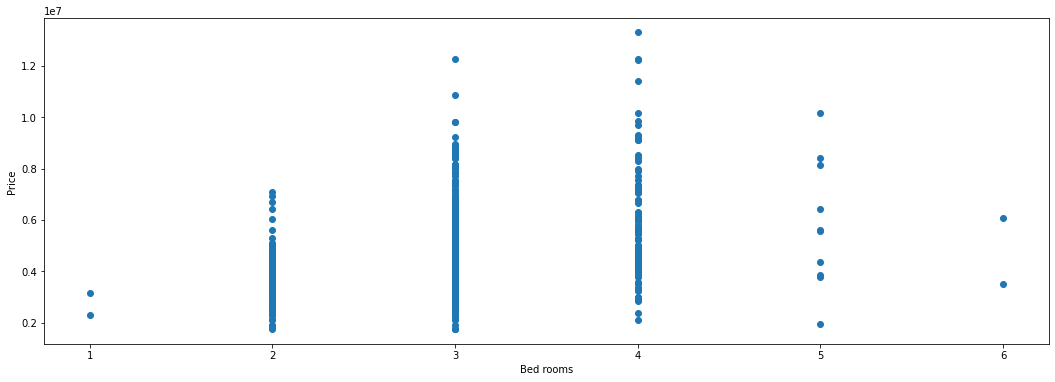

In [ ]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(df['bedrooms'],df['price'])
plt.xlabel("Bed rooms")
plt.ylabel("Price")
plt.show()

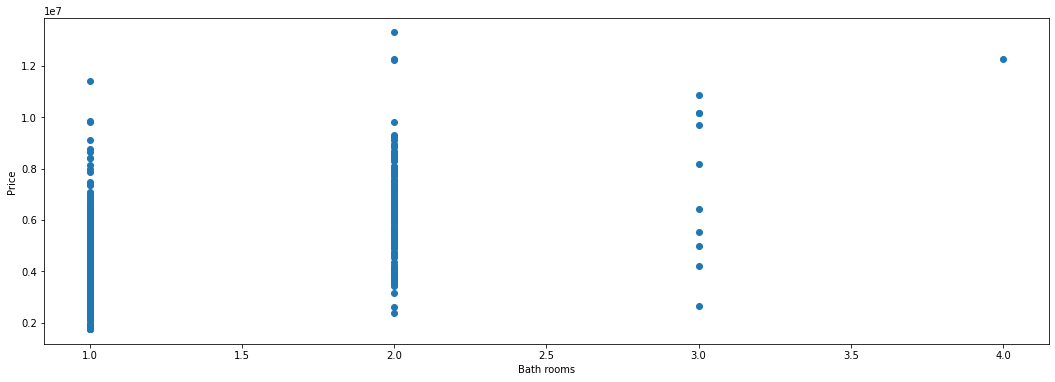

In [ ]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(df['bathrooms'],df['price'])
plt.xlabel("Bath rooms")
plt.ylabel("Price")
plt.show()

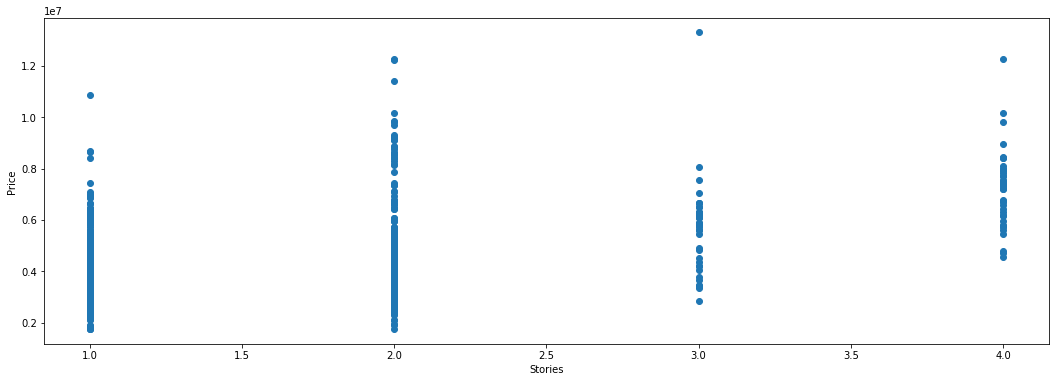

In [ ]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
plt.figure(figsize=(18, 6))
plt.scatter(df['stories'],df['price'])
plt.xlabel("Stories")
plt.ylabel("Price")
plt.show()

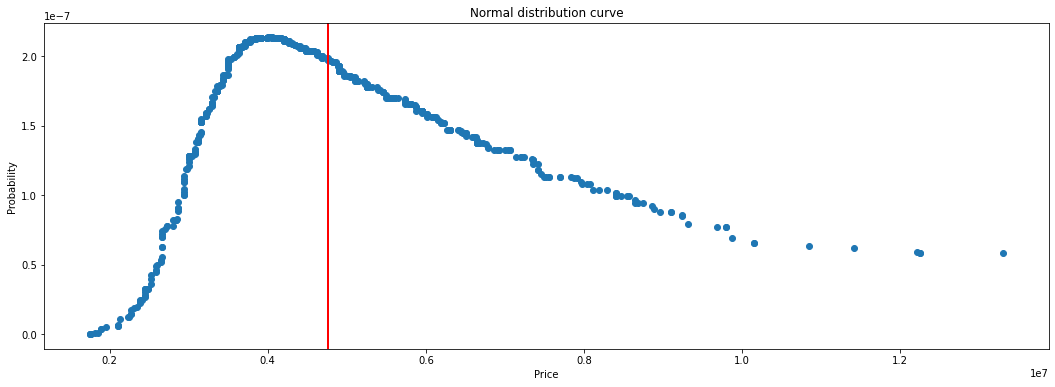

4766729.247706422


In [ ]:
# Create a normal distribution curve for the 'price'.
def prob_density_func(arr,mean,std):
  coeff = 1/(std * np.sqrt(2 * np.pi))
  expo = np.exp(-(arr - mean) **2/( 2 * std **2))
  prob = coeff * expo
  return prob

sorted_heights = np.sort(df['price'])
prob_array = prob_density_func(sorted_heights,np.mean(df['price']),np.std(df['price']))
# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize=(18, 6))
plt.title("Normal distribution curve")
plt.scatter(df['price'],prob_array)
plt.axvline(np.mean(df['price']), color='red', linewidth=2)
plt.xlabel("Price")
plt.ylabel("Probability")
plt.show()

print(np.mean(df['price']))
# Create a probablity density function for plotting the normal distribution


# Plot the normal distribution curve using plt.scatter() 


---

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

In [ ]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.
stat_dict = {'yes':1,'no':0}
def num_map(series):
    return series.map(stat_dict)

df[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']].apply(num_map, axis = 1)

In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Perform one hot encoding for furnishingstatus feature.
dummies_df = pd.get_dummies(df['furnishingstatus'], drop_first = True, dtype = int)

In [ ]:
# Drop 'furnishingstatus' feature
df.drop(columns = 'furnishingstatus', axis = 1, inplace = True)
df = pd.concat([df, dummies_df], axis = 1)

In [ ]:
# Print dataframe 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


---

#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)


In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(df.columns)
features.remove('price')

X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']


In [ ]:
X_train = np.squeeze(X_train)
y_train = np.squeeze(y_train)
X_test = np.squeeze(X_test )
y_test = np.squeeze(y_test)

In [ ]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.00e-85
Time:                        14:33:48   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.578e+04   2.97e+05     

In [ ]:
# Calculate N and p values
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
print("Number of rows (N):", num_rows)
print("Number of predictors (p):", num_predictors)


Number of rows (N): 381
Number of predictors (p): 13


**Q:** What is the Adjusted $R^2$ value?

**A:** 0.682


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the features
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_sm).fit()
lin_reg.params 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const              9.578423e+04
area               2.532873e+02
bedrooms           8.089314e+04
bathrooms          1.114751e+06
stories            4.172676e+05
mainroad           4.080737e+05
guestroom          2.757105e+05
basement           4.826035e+05
hotwaterheating    6.163754e+05
airconditioning    6.858393e+05
parking            3.031112e+05
prefarea           5.091921e+05
semi-furnished    -1.216527e+05
unfurnished       -3.911912e+05
dtype: float64

In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.


**Q:** What is the $R^2$ value for train set and test set?

**A:** 

---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df['price'], df[f])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 2 



{'area': 0.5359973457780796, 'bathrooms': 0.517545339455011}

In [ ]:
# Perform RFE and select best 7 features  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 10 features.
skl_lin_reg = LinearRegression()
rfe1 = RFE(estimator = skl_lin_reg, n_features_to_select = 7)

# Fit with 10 features.
rfe1.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n") # List of features out of which 10 best featuers are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values      
print(rfe1.ranking_, "\n")


dict_keys(['area', 'bathrooms']) 

[ True  True] 

[1 1] 



In [ ]:
# Print the 7 features selected by RFE in the previous step.
X_major = X_train[major_features.keys()].columns[rfe1.support_]
print(X_major)

Index(['area', 'bathrooms'], dtype='object')


In [ ]:
X = df[X_major]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train_reshaped1 = X_train.values.reshape(-1, 1)
X_test_reshaped1 = X_test.values.reshape(-1, 1)
y_train_reshaped1 = y_train.values.reshape(-1, 1)
y_test_reshaped1 = y_test.values.reshape(-1, 1)
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped1)
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}")
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")
# Split the DataFrame into the train and test sets such that test set has 33% of the values.


# Build linear regression model using the 'sklearn.linear_model' module.


# Print the value of the intercept


# Print the names of the features along with the values of their corresponding coefficients.




Constant       766710.939601
area            375.296634
bathrooms       1632244.738419


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)
y_train_pred = np.squeeze(y_train_pred)
y_test_pred = np.squeeze(y_test_pred)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped1, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped1, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped1, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped1, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped1, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped1, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped1, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped1, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.477
Mean Squared Error: 1619860700245.279
Root Mean Squared Error: 1272737.483
Mean Absolute Error: 952740.850


Test Set
--------------------------------------------------
R-squared: 0.445
Mean Squared Error: 2377650568479.758
Root Mean Squared Error: 1541963.219
Mean Absolute Error: 1174280.997


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

Mean of residuals = 0.000



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


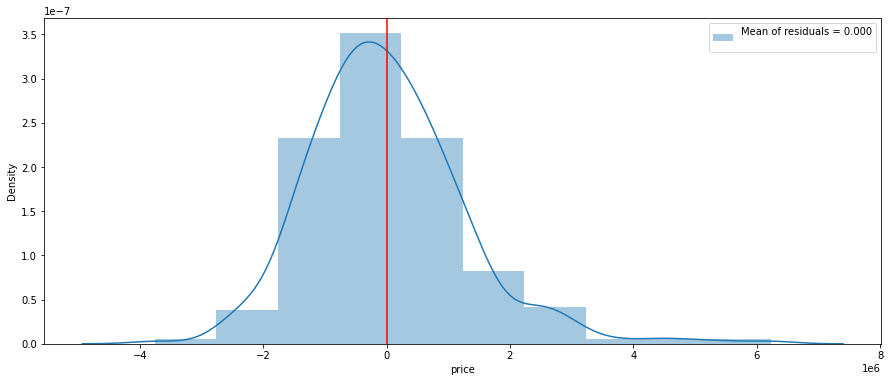

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.

train_residuals = np.squeeze(y_train - y_train_pred)

print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")

plt.figure(figsize = (15, 6))
sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n")
plt.axvline(x = np.mean(train_residuals), color = 'red')
plt.legend()
plt.show()

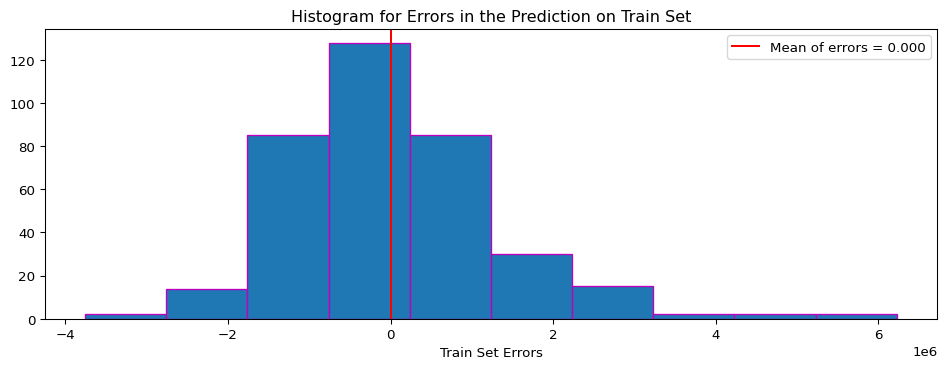

In [ ]:
from pandas import Series
from numpy.random import randn
errors_train = y_train - y_train_pred

plt.figure(figsize = (12, 4), dpi = 96)
plt.hist(errors_train, bins = 'sturges', edgecolor = 'm')
plt.title("Histogram for Errors in the Prediction on Train Set")
plt.axvline(x = errors_train.mean(), label = f"Mean of errors = {errors_train.mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()

Mean of the test residuals id : -98156.244


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


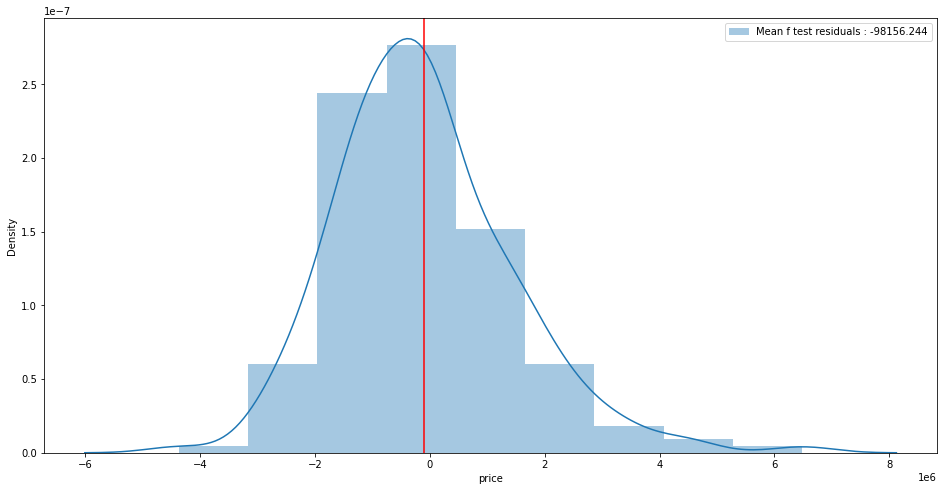

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
test_residuals = y_test - y_test_pred
print(f"Mean of the test residuals id : {np.mean(test_residuals):.3f}")
plt.figure(figsize=(16,8))
sns.distplot(test_residuals,bins = 'sturges',label = f"Mean f test residuals : {np.mean(test_residuals):.3f}")
plt.axvline(np.mean(test_residuals),color='r')
plt.legend()
plt.show()

---

#### 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

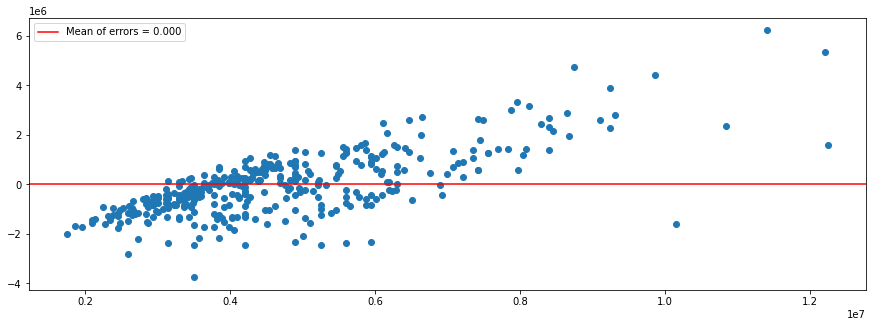

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize = (15, 5))
plt.scatter(y_train, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

---

---